In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# open dataset
df_male = pd.read_csv('/content/male_players.csv')

In [202]:
df_male.head() # check the data

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Height_cm,Height_Category
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,182.88,Tall
1,2,Rodri,91,66,80,86,84,87,85,65,...,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,191.00,Tall
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,195.58,Tall
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,186.00,Tall
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,176.00,Medium


In [9]:
# Check the data type
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16161 non-null  int64  
 1   Rank                   16161 non-null  int64  
 2   Name                   16161 non-null  object 
 3   OVR                    16161 non-null  int64  
 4   PAC                    16161 non-null  int64  
 5   SHO                    16161 non-null  int64  
 6   PAS                    16161 non-null  int64  
 7   DRI                    16161 non-null  int64  
 8   DEF                    16161 non-null  int64  
 9   PHY                    16161 non-null  int64  
 10  Acceleration           16161 non-null  int64  
 11  Sprint Speed           16161 non-null  int64  
 12  Positioning            16161 non-null  object 
 13  Finishing              16161 non-null  object 
 14  Shot Power             16161 non-null  int64  
 15  Lo

In [12]:
# drop unnamed columns
df_male.drop('Unnamed: 0', axis = 1, inplace = True)

In [204]:
# Top 10 players by Overall Rating
df_male[['Name', 'Position','OVR', 'Team', 'League', 'Age', 'PAC', 'SHO','DEF','PHY','DRI','PAS']].sort_values(by='OVR', ascending=False).head(10)

,Name,Position,OVR,Team,League,Age,PAC,SHO,DEF,PHY,DRI,PAS
0,Kylian Mbappé,ST,91,Real Madrid,LALIGA EA SPORTS,25,97,90,36,78,92,80
2,Erling Haaland,ST,91,Manchester City,Premier League,24,88,92,45,88,81,70
1,Rodri,CDM,91,Manchester City,Premier League,28,66,80,87,85,84,86
3,Jude Bellingham,CAM,90,Real Madrid,LALIGA EA SPORTS,21,80,87,78,83,88,83
4,Vini Jr.,LW,90,Real Madrid,LALIGA EA SPORTS,24,95,84,29,69,91,81
5,Kevin De Bruyne,CM,90,Manchester City,Premier League,33,67,87,65,78,87,94
6,Harry Kane,ST,90,FC Bayern München,Bundesliga,31,65,93,49,82,83,84
11,Lautaro Martínez,ST,89,Lombardia FC,Serie A Enilive,27,82,88,54,85,87,75
14,Mohamed Salah,RW,89,Liverpool,Premier League,32,89,87,45,75,88,82
13,Marc-André ter Stegen,GK,89,FC Barcelona,LALIGA EA SPORTS,32,86,85,47,86,91,89


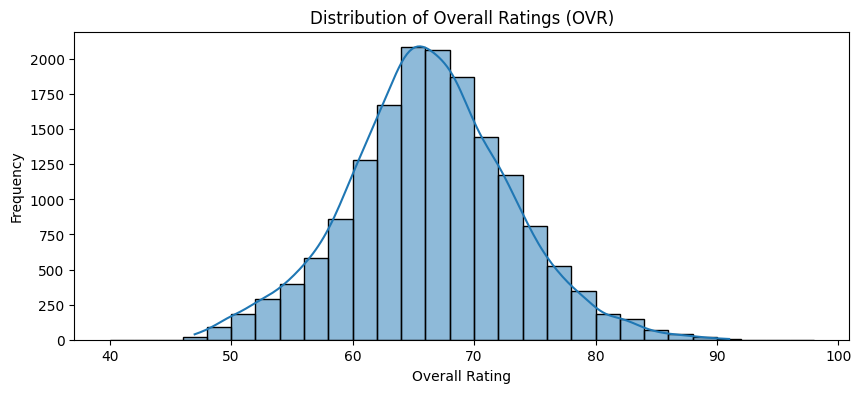

In [15]:
# Distribution of OVR
bins = np.arange(40,100,2)
plt.figure(figsize=(10, 4))
sns.histplot(x = 'OVR', data = df_male, bins = bins, kde=True)
plt.title('Distribution of Overall Ratings (OVR)')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-74-6c09641117e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='OVR', data=df_male, order=position_order, palette='deep')


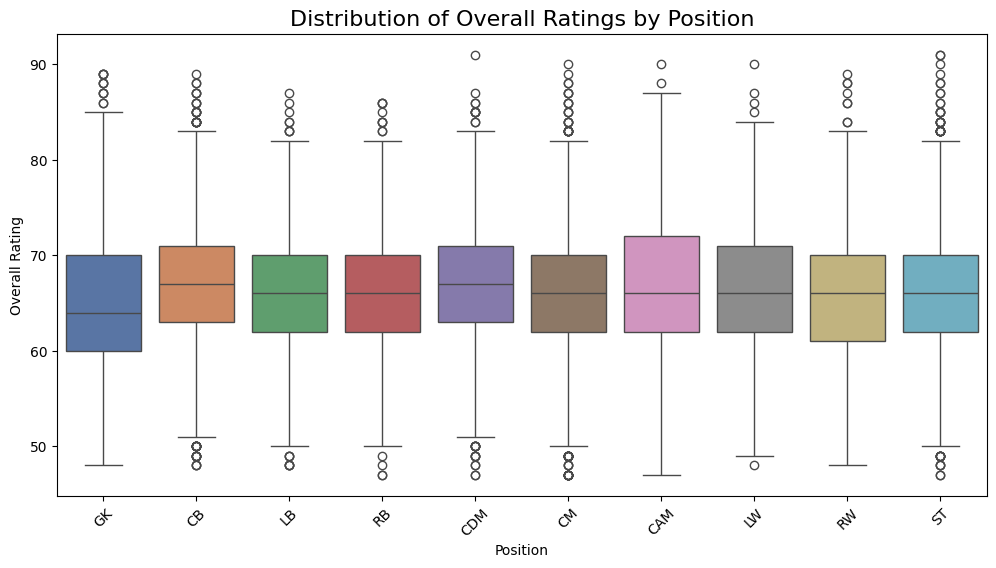

In [74]:
# Distribution of OVR Ratings by Position

# Define the custom order for positions
position_order = ['GK', 'CB', 'LB', 'RB', 'CDM', 'CM', 'CAM', 'LW', 'RW', 'ST']

plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='Position', y='OVR', data=df_male, order=position_order, palette='deep')

# Add title and labels
plt.title('Distribution of Overall Ratings by Position', fontsize=16)
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)

plt.show()

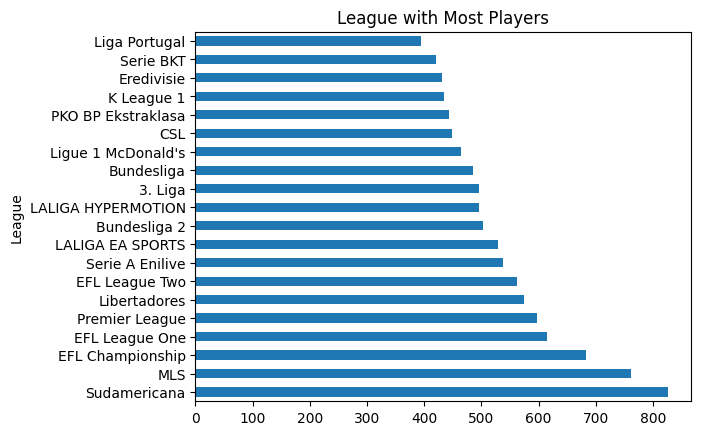

In [61]:
# League with Most Players
df_male['League'].value_counts().head(20).plot(kind='barh')
plt.title("League with Most Players")
plt.show()

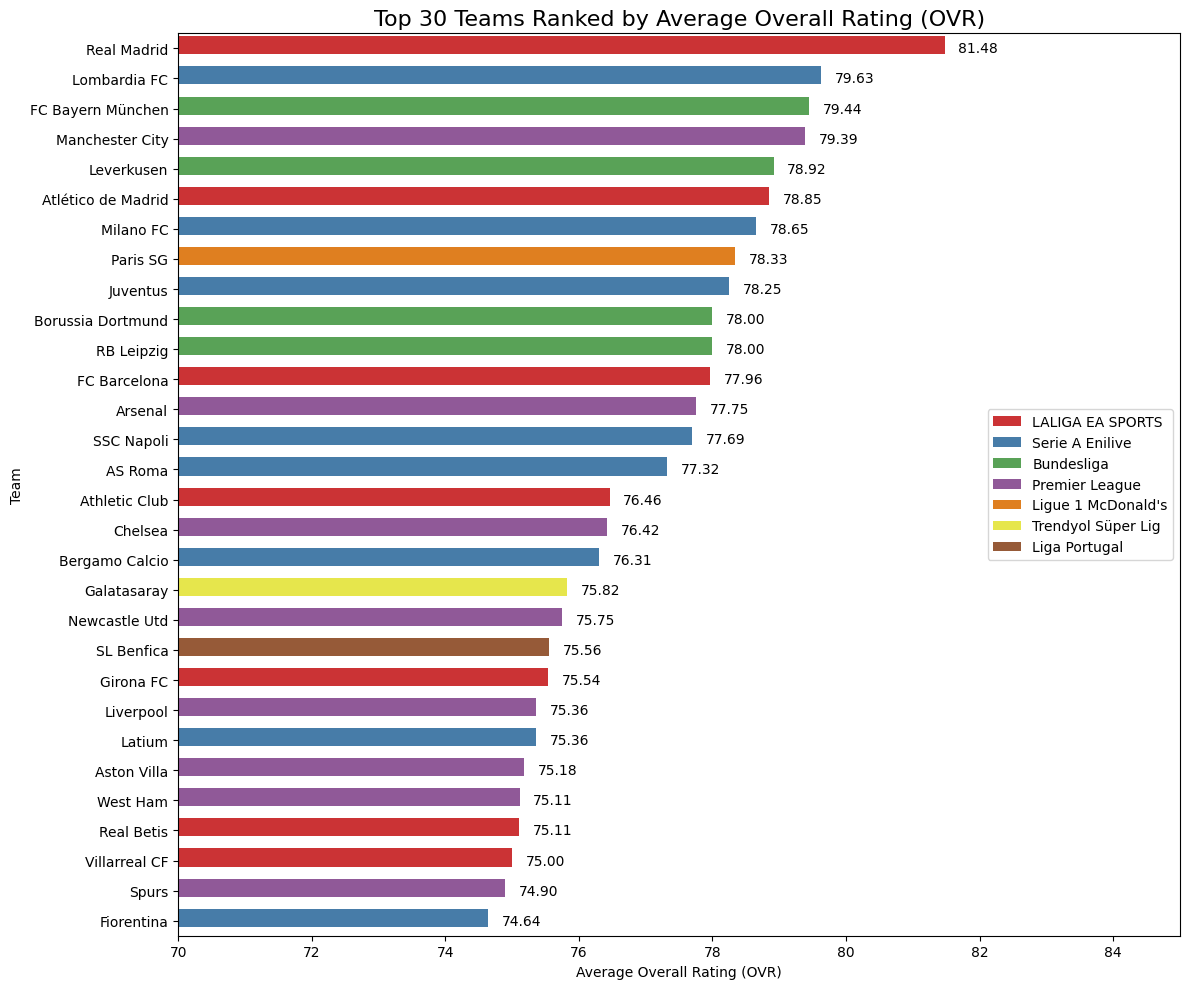

In [39]:
# Top 30 Teams Ranked by Average OVR

# Group by team and calculate the average overall rating
team_avg_ovr = df_male.groupby(['Team', 'League'])['OVR'].mean().sort_values(ascending=False).reset_index().head(30)

# Plotting the ranked teams based on their average OVR
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x='OVR', y='Team', data=team_avg_ovr, hue='League', palette='Set1')

# Increase bar width
for bar in bar_plot.patches:
    bar.set_height(0.6)

# Add title and labels
plt.title('Top 30 Teams Ranked by Average Overall Rating (OVR)', fontsize=16)
plt.xlabel('Average Overall Rating (OVR)')
plt.xlim([70, 85])
plt.ylabel('Team')

# Add value labels on each bar
for index, (team, ovr) in enumerate(zip(team_avg_ovr['Team'], team_avg_ovr['OVR'])):
    plt.text(ovr + 0.5, index, f'{ovr:.2f}', va='center', ha='center', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.legend(loc='center right')

plt.show()


In [186]:
print(df_male['Height'])

0         182cm / 6'0"
1         191cm / 6'3"
2         195cm / 6'5"
3         186cm / 6'1"
4         176cm / 5'9"
             ...      
16156     169cm / 5'7"
16157     176cm / 5'9"
16158    181cm / 5'11"
16159     187cm / 6'2"
16160     182cm / 6'0"
Name: Height, Length: 16161, dtype: object


In [187]:
# Function to convert height to centimeters
def convert_height_to_cm(height):
    height = height.strip()  # Remove leading/trailing whitespace
    cm_part, ft_in_part = height.split(' / ')

    # Convert cm part
    cm_height = int(cm_part.replace('cm', '').strip())

    # Convert ft/in part
    if "'" in ft_in_part and '"' in ft_in_part:
        feet, inches = ft_in_part.split("'")
        inches = inches.replace('"', '').strip()  # Remove the inch symbol and whitespace
        ft_height = int(feet.strip()) * 30.48 + int(inches) * 2.54
    else:
        ft_height = 0  # Fallback if format is not recognized

    return max(cm_height, ft_height)  # Use the maximum height

# Convert the height column
df_male['Height_cm'] = df_male['Height'].apply(convert_height_to_cm)

# Convert speed columns to numeric (if they are not already)
df_male['Sprint Speed'] = pd.to_numeric(df_male['Sprint Speed'], errors='coerce')
df_male['Acceleration'] = pd.to_numeric(df_male['Acceleration'], errors='coerce')

# Check for any NaN values in Height_cm after conversion
print(df_male['Height_cm'].isnull().sum(), "NaN values in Height_cm")

0 NaN values in Height_cm


In [189]:
# Convert the height data into height categories
def categorize_height(height):
    if height < 170:
        return 'Short'
    elif 170 <= height < 180:
        return 'Medium'
    else:
        return 'Tall'

# Apply the categorization
df_male['Height_Category'] = df_male['Height_cm'].apply(categorize_height)

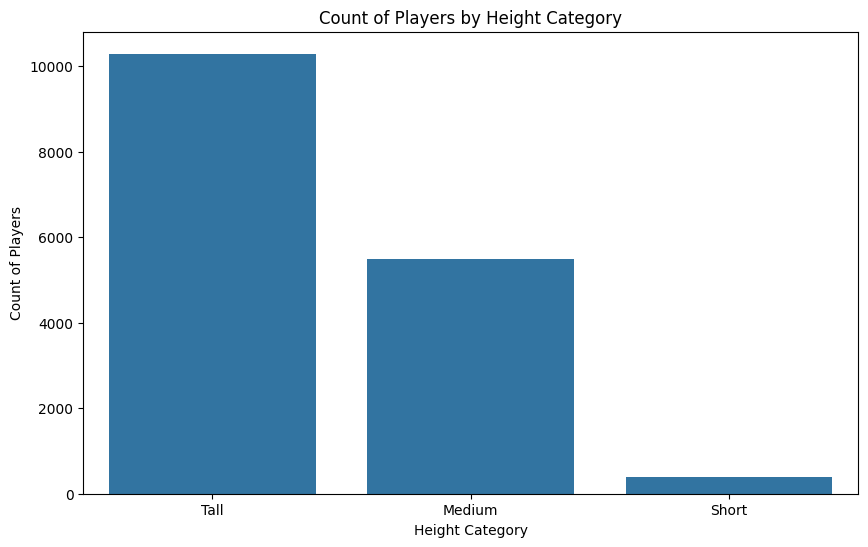

In [190]:
# Assuming df_male is already defined and contains the 'Height_Category' column
height_counts = df_male['Height_Category'].value_counts().reset_index()
height_counts.columns = ['Height_Category', 'Count']

# Set the color palette
sns.set_palette("tab10")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Height_Category', y='Count', data=height_counts)

# Adding titles and labels
plt.title('Count of Players by Height Category')
plt.xlabel('Height Category')
plt.ylabel('Count of Players')
plt.show()


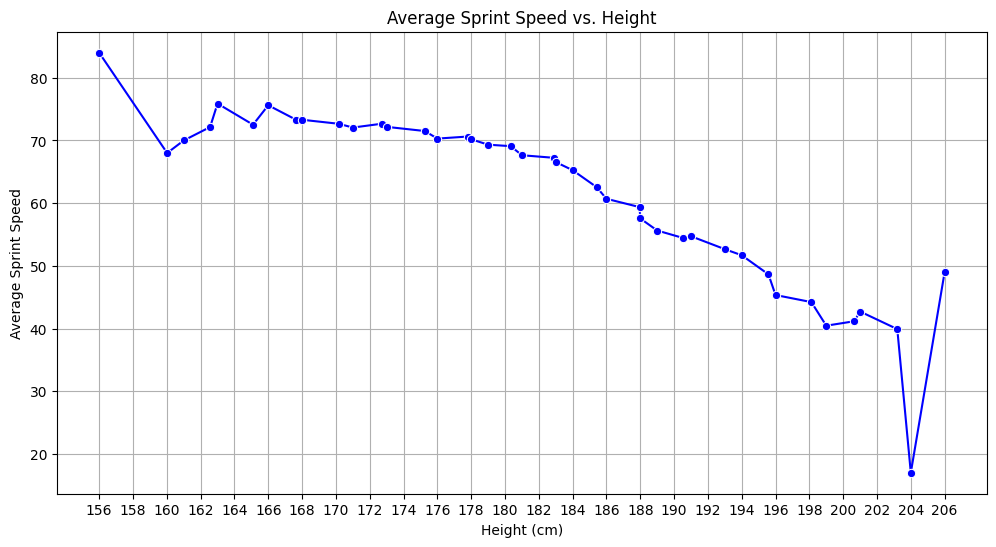

In [148]:
# Calculate average sprint speed for each height value
avg_sprint_by_height = df_male.groupby('Height_cm')['Sprint Speed'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for Average Sprint Speed vs Height
sns.lineplot(x='Height_cm', y='Sprint Speed', data=avg_sprint_by_height, marker='o', color='blue')
plt.title('Average Sprint Speed vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Average Sprint Speed')
plt.grid(True)

# Set x-axis ticks in increments of 2 cm
plt.xticks(range(int(avg_sprint_by_height['Height_cm'].min()), int(avg_sprint_by_height['Height_cm'].max()) + 1, 2))

plt.show()

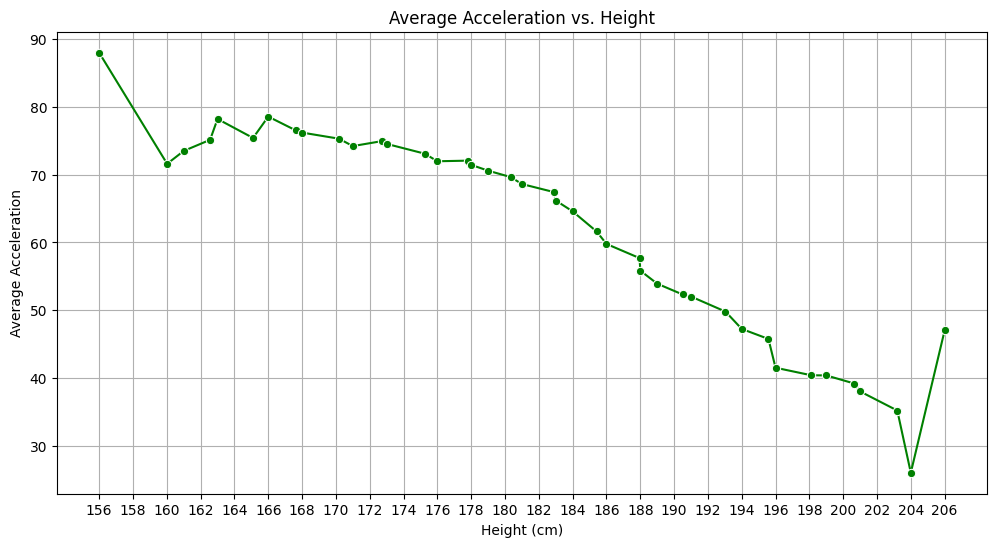

In [197]:
# Calculate average acceleration for each height value
avg_acceleration_by_height = df_male.groupby('Height_cm')['Acceleration'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for Average Acceleration vs Height
sns.lineplot(x='Height_cm', y='Acceleration', data=avg_acceleration_by_height, marker='o', color='green')
plt.title('Average Acceleration vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Average Acceleration')
plt.grid(True)

# Set x-axis ticks in increments of 2 cm
plt.xticks(range(int(avg_acceleration_by_height['Height_cm'].min()), int(avg_acceleration_by_height['Height_cm'].max()) + 1, 2))

plt.show()


In [200]:
# Filter the DataFrame for players with 156 cm height and 90 average acceleration
players_filtered = df_male[(df_male['Height_cm'] == 156) & (df_male['Acceleration'] == 95)]

# Display the names of the players
player_names = players_filtered['Name']
print(player_names)

Series([], Name: Name, dtype: object)


In [201]:
players_with_156_height = df_male[df_male['Height_cm'] == 156]
print(players_with_156_height[['Name', 'Acceleration']])


                Name  Acceleration
1710  Nahuel Barrios            92
3770    Braian Oyola            84


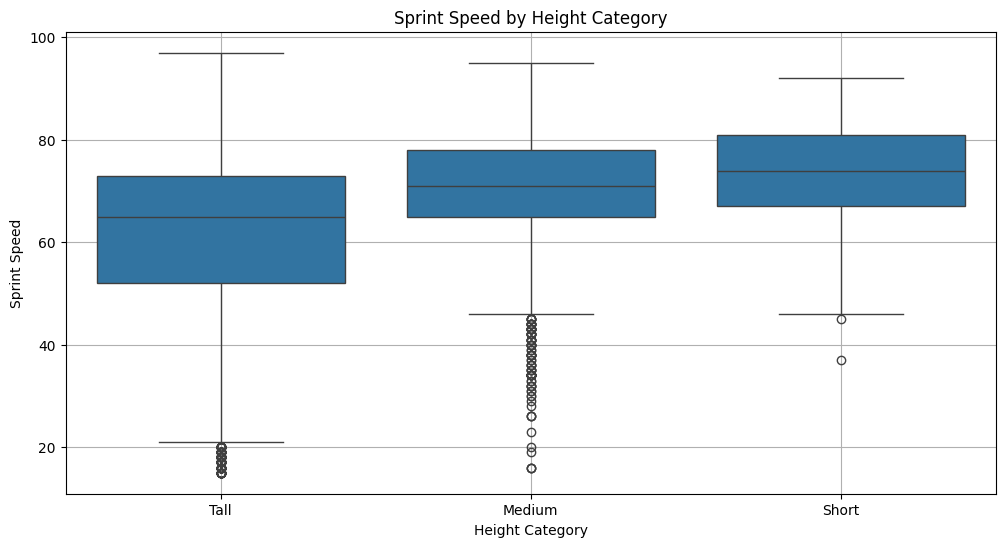

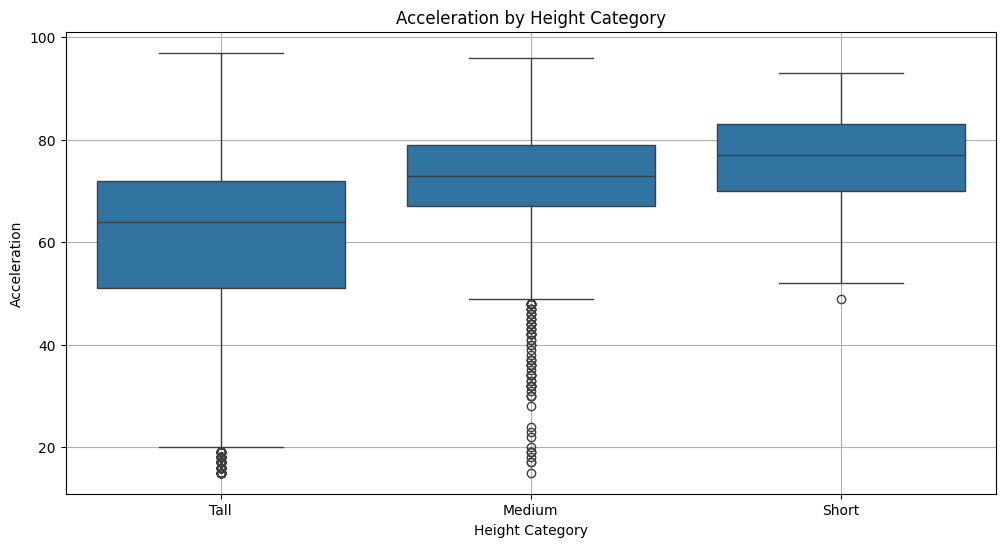

In [193]:
# Box plot for Sprint Speed without hue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Height_Category', y='Sprint Speed', data=df_male)
plt.title('Sprint Speed by Height Category')
plt.xlabel('Height Category')
plt.ylabel('Sprint Speed')
plt.grid(True)
plt.show()

# Box plot for Acceleration without hue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Height_Category', y='Acceleration', data=df_male)
plt.title('Acceleration by Height Category')
plt.xlabel('Height Category')
plt.ylabel('Acceleration')
plt.grid(True)
plt.show()


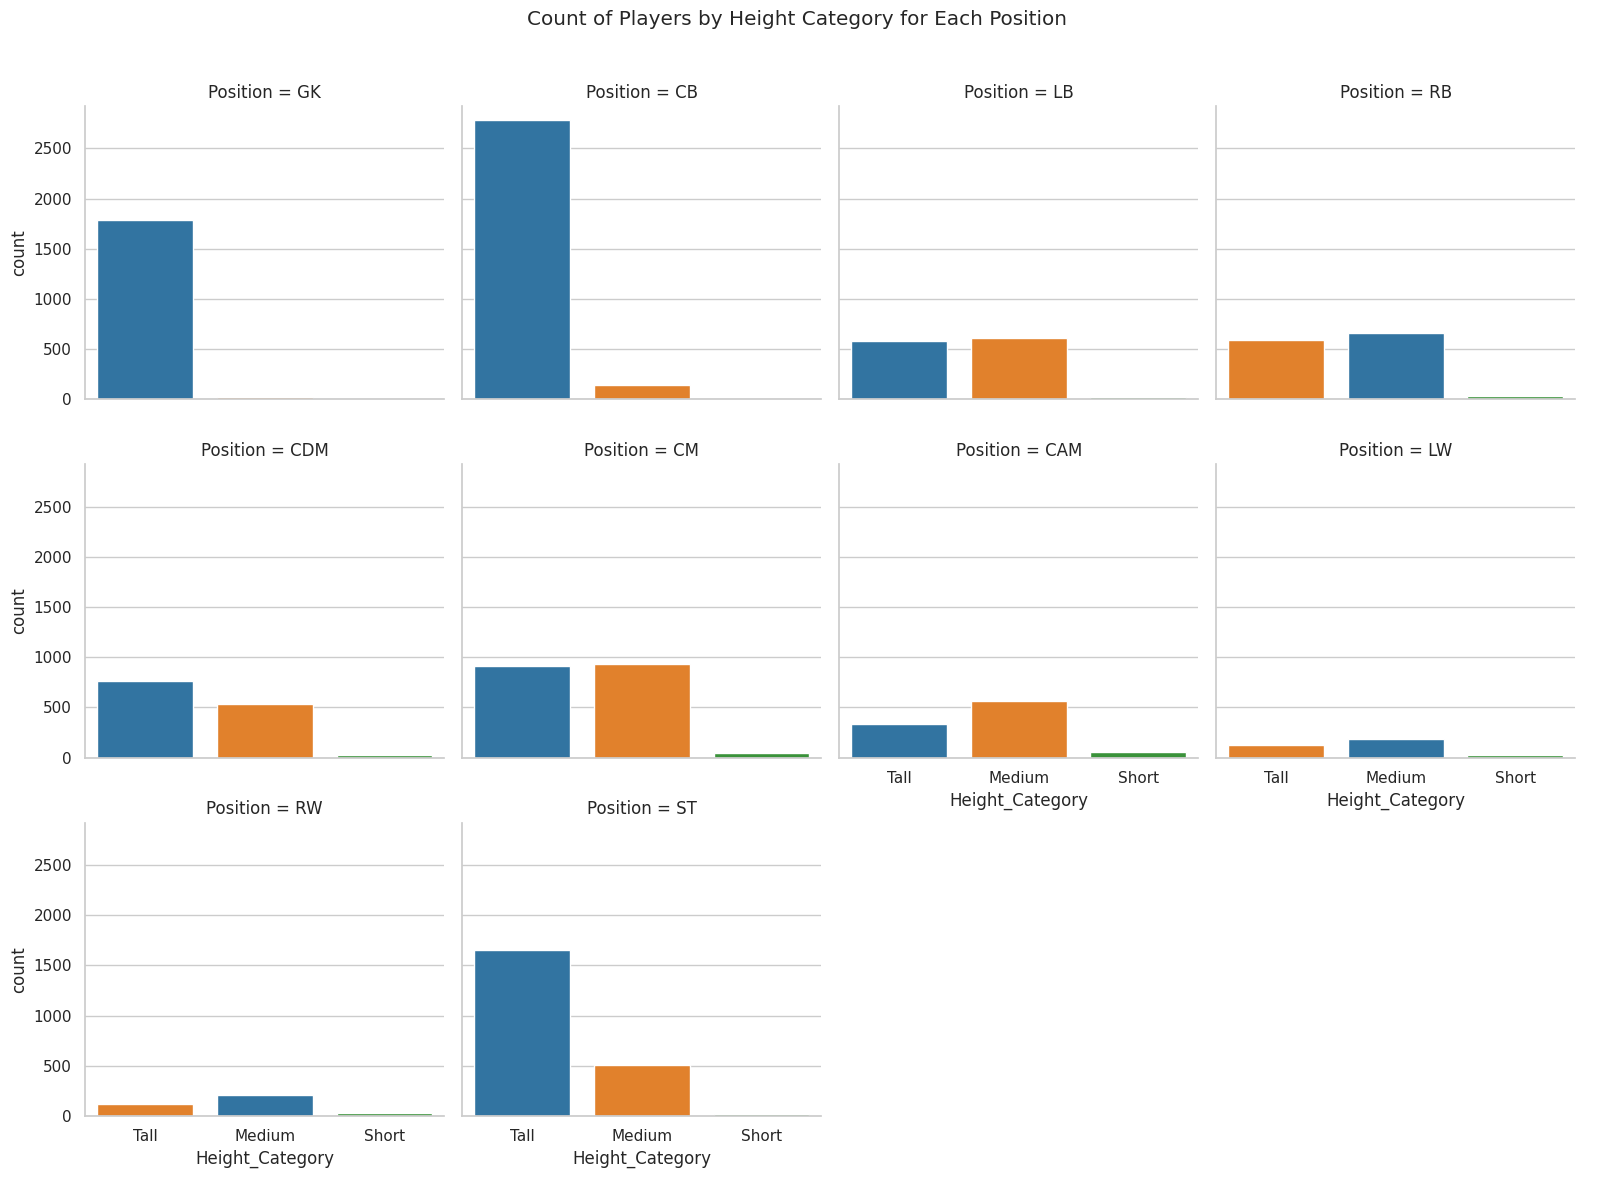

In [225]:
# FacetGrid
g = sns.FacetGrid(df_male, col='Position', col_wrap=4, height=4)
g.map_dataframe(sns.countplot, x='Height_Category', hue='Height_Category', palette='tab10')

# legend and title
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Players by Height Category for Each Position')
plt.show()

In [205]:
# Young Player with High OVR
print(df_male[(df_male['Age'] < 23) & (df_male['OVR'] > 80)][['Name', 'Team', 'Age', 'OVR']])

                  Name               Team  Age  OVR
3      Jude Bellingham        Real Madrid   21   90
25       Florian Wirtz         Leverkusen   21   88
29       Jamal Musiala  FC Bayern München   21   87
57               Pedri       FC Barcelona   21   86
82         Cole Palmer            Chelsea   22   85
91       Nico Williams      Athletic Club   22   85
135  Eduardo Camavinga        Real Madrid   21   83
147     Joško Gvardiol    Manchester City   22   83
167               Gavi       FC Barcelona   20   83
180        Xavi Simons         RB Leipzig   21   83
184        Nuno Mendes           Paris SG   22   83
203     Moisés Caicedo            Chelsea   22   82
253            Savinho    Manchester City   20   82
256      Michael Olise  FC Bayern München   22   82
274     Destiny Udogie              Spurs   21   82
285              Balde       FC Barcelona   20   81
307     Piero Hincapié         Leverkusen   22   81
349       Lamine Yamal       FC Barcelona   17   81


In [207]:
# highest OVR for each position
top_players = df_male.loc[df_male.groupby('Position', observed=False)['OVR'].idxmax()]

# Sort by GK to ST
top_players['Position'] = top_players['Position'].astype("category").cat.reorder_categories(['GK', 'CB', 'LB', 'RB', 'CDM', 'CM', 'CAM', 'LW', 'RW', 'ST'])
top_players_sorted = top_players.sort_values(by='Position')

# Select
result = top_players_sorted[['Name', 'Position', 'OVR', 'Team', 'League', 'Age', 'PAC', 'SHO', 'DEF', 'PHY', 'DRI', 'PAS']]
result

,Name,Position,OVR,Team,League,Age,PAC,SHO,DEF,PHY,DRI,PAS
8,Gianluigi Donnarumma,GK,89,Paris SG,Ligue 1 McDonald's,25,90,84,52,87,90,73
12,Virgil van Dijk,CB,89,Liverpool,Premier League,33,78,60,89,86,71,71
32,Theo Hernández,LB,87,Milano FC,Serie A Enilive,26,95,76,81,89,84,78
54,Carvajal,RB,86,Real Madrid,LALIGA EA SPORTS,32,81,58,81,79,81,79
1,Rodri,CDM,91,Manchester City,Premier League,28,66,80,87,85,84,86
5,Kevin De Bruyne,CM,90,Manchester City,Premier League,33,67,87,65,78,87,94
3,Jude Bellingham,CAM,90,Real Madrid,LALIGA EA SPORTS,21,80,87,78,83,88,83
4,Vini Jr.,LW,90,Real Madrid,LALIGA EA SPORTS,24,95,84,29,69,91,81
14,Mohamed Salah,RW,89,Liverpool,Premier League,32,89,87,45,75,88,82
0,Kylian Mbappé,ST,91,Real Madrid,LALIGA EA SPORTS,25,97,90,36,78,92,80


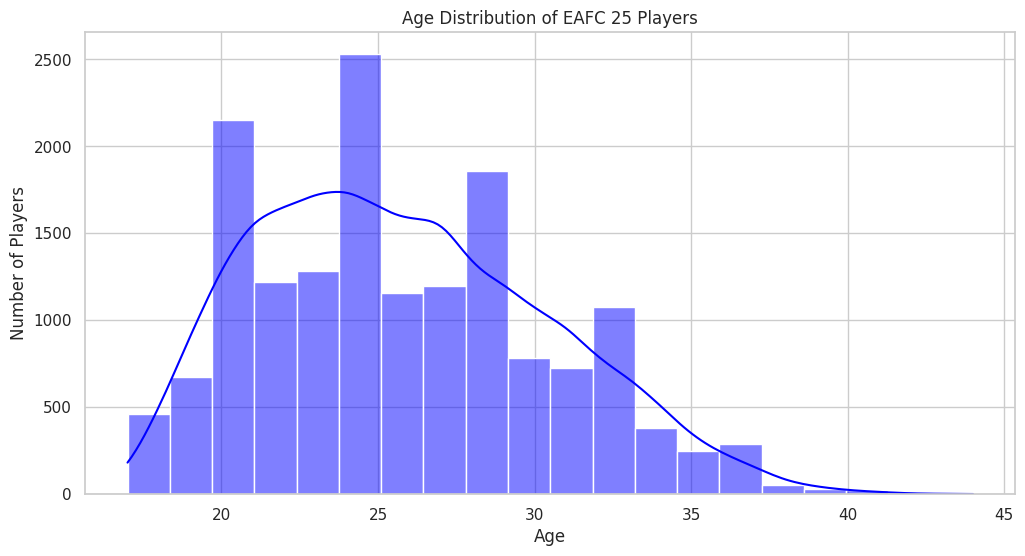

In [215]:
# Plotting the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_male['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of EAFC 25 Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

In [209]:
age_stats = df_male['Age'].describe()
print(age_stats)


count    16161.000000
mean        25.790545
std          4.662681
min         17.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         44.000000
Name: Age, dtype: float64


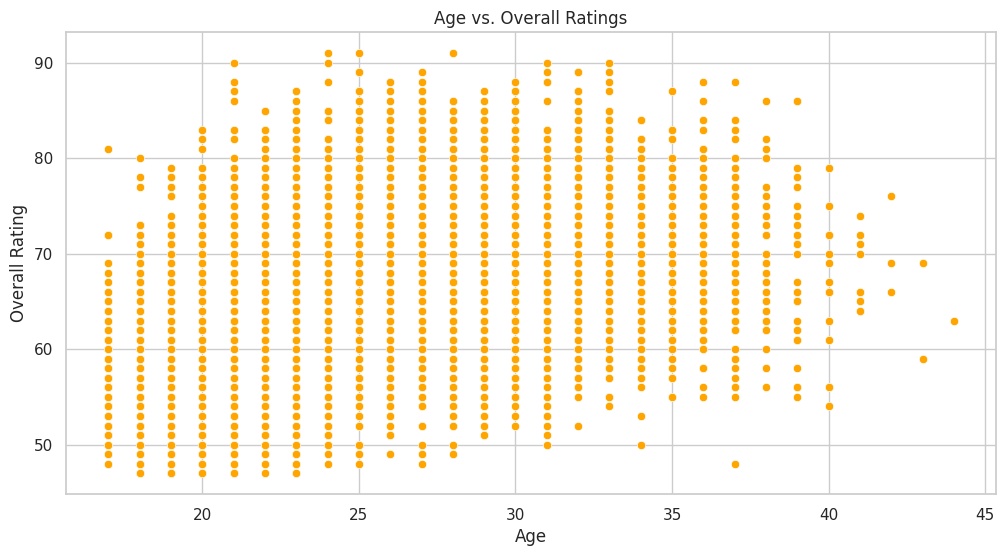

In [210]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='OVR', data=df_male, color='orange')
plt.title('Age vs. Overall Ratings')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


<ipython-input-224-384f9ab1feac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='OVR', y='League', data=league_avg_ovr, palette='viridis')


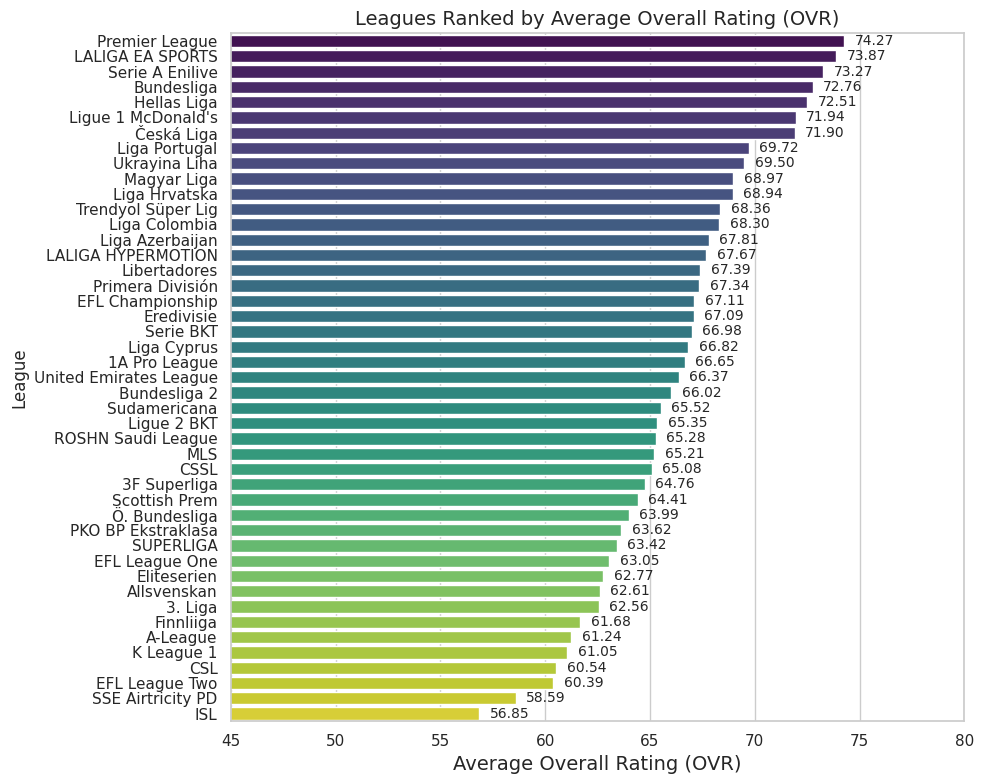

In [224]:
# Group by league and calculate the average overall rating
league_avg_ovr = df_male.groupby('League')['OVR'].mean().sort_values(ascending=False).reset_index()

# Plot the leagues ranked by average OVR
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x='OVR', y='League', data=league_avg_ovr, palette='viridis')

# Add title and axis labels
plt.title('Leagues Ranked by Average Overall Rating (OVR)', fontsize=14)
plt.xlabel('Average Overall Rating (OVR)', fontsize=14)
plt.xlim([45, 80])
plt.ylabel('League')

# Add value labels on each bar
for index, value in enumerate(league_avg_ovr['OVR']):
    plt.text(value + 0.5, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

# Show the plot with tight layout
plt.tight_layout()
plt.show()
